In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import re
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize

In [4]:
from skimage.io import imread
from collections import Counter
from string import punctuation

<p style="text-align: right; color: saddlebrown; font-size: 13px" > Part $IV$

<p style="text-align: center; color: saddlebrown; font-size: 20px" > Analysis of James Joyce's book "Finnegans Wake"

<p style="text-align: center; color: saddlebrown; font-size: 15px" > Concept and execution: Irina Nedyalkova

With this work, I show respect and my own curiosity, to the vividness and determination of the personality of Mr. James Joyce. The book "Finnegans Wake" is not a novel, it is a brain sport, a fountain of creativity! It has been written in 17 years and has 17 chapters, divided into four parts:
- Part I contains eight chapters;
- Parts II contains four chapters;
- Part III also four chapters;
- Part $IV$ only one short chapter.

The book forms a cycle: the last sentence recirculates to the first sentence. It is a $360^{\circ}$ story.

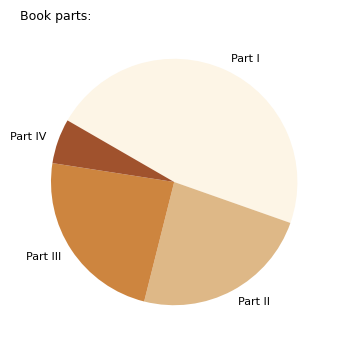

In [5]:
plt.figure(figsize = (4, 4))

values = [8, 4, 4, 1]
colors = ["oldlace", "burlywood", "peru", "sienna"]

names = "Part I", "Part II", "Part III", "Part IV"
fontsize = {"fontsize": 8}

plt.pie(values, labels = names, colors = colors, textprops = fontsize, counterclock = False, startangle = 150)
plt.title("Book parts:", size = "9", loc = "left")

plt.show()

"...riverrun, past Eve and Adam’s, from swerve of shore to bend of bay, brings us by a commodius vicus of recirculation back to Howth Castle and Environs. A way a lone a last a loved a long the..." From the very first sentence, it has been shown, to read the book in an uncommon way.

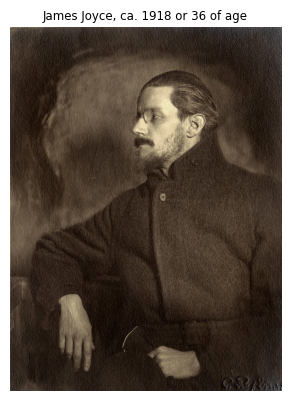

In [6]:
he = imread("joyce.jpg")
plt.figure(figsize = (3.5, 6.5))
plt.axis("off")
plt.title("James Joyce, ca. 1918 or 36 of age", size = 8.5)
plt.imshow(he)
plt.show()

And to be fluid with the conception, I start analyzing from Part $IV$:

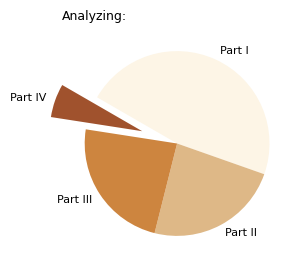

In [7]:
plt.figure(figsize = (3, 3))

values = [8, 4, 4, 1]
colors = ["oldlace", "burlywood", "peru", "sienna"]

explode = (0, 0, 0, 0.4)      # mark the part we want > 0

names = "Part I", "Part II", "Part III", "Part IV"
fontsize = {"fontsize": 8}
plt.pie(values, labels = names, colors = colors, textprops = fontsize,
        explode = explode, counterclock = False, startangle = 150)
plt.title("Analyzing:", size = "9", loc = "left") 

plt.show()

- I copied the words from a .pdf to a .docs file
- than I did data cleaning, manually, to experience the story and what it feels like to clean data
- Part IV has its moving melody and the very last sentences are deeply affecting

<p style="text-align: left; color: saddlebrown; font-size: 15px" > Welcome to Part $IV$

In [8]:
CORPUS_part4 = open("fw_last_chapter.docx", "r").read()

In [9]:
#CORPUS_part4              # Large data stays closed because of GitHub

When analyzing data, I like to have it open. It is like... data speak to me. We have a connection. Later, I could close the variable but when I work, I prefer to have it open. The library "nltk" is a Natural Language ToolKit working with human language data. Anyway, it is time to dip my toe with a sentence or two. 

In [10]:
sentence1 = "Come, hours, be ours! But still."

word_tokenize(sentence1)

['Come', ',', 'hours', ',', 'be', 'ours', '!', 'But', 'still', '.']

In [11]:
Counter(word_tokenize(sentence1))                # apply on tiny pieces first

Counter({'Come': 1,
         ',': 2,
         'hours': 1,
         'be': 1,
         'ours': 1,
         '!': 1,
         'But': 1,
         'still': 1,
         '.': 1})

As in math, so in literature, we break the whole into parts to look closer and to make something difficult more easy to understand.

In [12]:
nltk.pos_tag(word_tokenize(sentence1))

[('Come', 'NNP'),
 (',', ','),
 ('hours', 'NNS'),
 (',', ','),
 ('be', 'VB'),
 ('ours', 'VBN'),
 ('!', '.'),
 ('But', 'CC'),
 ('still', 'RB'),
 ('.', '.')]

Part of Speech tagging are short codes, representing specific parts of speech:
- pos_tag helps identifying the correct meaning of the word based on the context;
- pos_tag provides valuable information about the relationship between words;
- pos_tag is important in understanding the structure and meaning of text.

In [13]:
nltk_codes = pd.DataFrame({"parts in sentence": ["Proper noun, singular phrase", "Noun, plural", "Verb",
                                                   "Verb, past participle", "Coordinating conjunction", "Adverb"],
                               "nltk parts tag": ["NNP", "NNS", "VB", "VBN", "CC", "RB"]})

In [14]:
nltk_codes.style.hide()

parts in sentence,nltk parts tag
"Proper noun, singular phrase",NNP
"Noun, plural",NNS
Verb,VB
"Verb, past participle",VBN
Coordinating conjunction,CC
Adverb,RB


No need to have all the tags in mind, we build our own search function:

In [15]:
def tag(word):
    return pos_tag(word_tokenize(word))

In [16]:
tag("be")

[('be', 'VB')]

In [17]:
tag("hours")

[('hours', 'NNS')]

There are many ways to look closer and closer and closer into a text. Below, we use the tags to find parts of the speech:

In [18]:
is_verb = lambda pos: pos[:3] == "VB"
is_noun = lambda pos: pos[:3] == "NNS"
is_conj = lambda pos: pos[:3] == "CC"

In [19]:
[word for (word, pos) in nltk.pos_tag(word_tokenize(sentence1)) if is_verb(pos)]       # a verb indicates an action

['be']

In [20]:
[word for (word, pos) in nltk.pos_tag(word_tokenize(sentence1)) if is_noun(pos)]      # a sentence contains at least one noun

['hours']

In [21]:
[word for (word, pos) in nltk.pos_tag(word_tokenize(sentence1)) if is_conj(pos)]     # a coordinating conjunction connects

['But']

Better we use lambda's rarely for a quick one-liner, something we need to know now, but probably do not need in the future.

> "a word is characterized by the company it keeps", J. R. Firth, a leading figure in British linguistics during the 1950s

Each language can be described in terms of a distributional structure, how a part (element) relates to other parts, and
how this structure is complete without interrupting the meaning. The distribution of an element is understood as the sum of all its environments and the environment is an existing array of its co-occurrents (occurring together, at the same time with the other elements), each in a particular position. All elements in a language are grouped into classes whose
relative occurrence can be stated exactly. At that point, for the occurrence of a particular member of one class relative to a particular member of another class, it would be necessary to speak in terms of probability, based on the frequency of
that occurrence in a sample.

It has been thought that one could only state the normative rules of grammar or the rules for a standard dialect but not for "substandard" speech or slang. However, in all dialect studies it has been possible to find elements having regularities of occurrence. Does structure really exist in the language? Yes, it does! As much as any scientific structure really exists in the data it describes. The scientific structure states a network of relations and lines of distributional structure can be found in experimental work, indeed. Have in mind that different styles differ in details (distributional perception).

"Finnegans Wake" is mostly written in unique words and expressions. Part $IV$ has 5550 of them:

In [22]:
len(Counter(word_tokenize(CORPUS_part4)))                    # unique expressions

5550

All words and signs of Part $IV$ are 15759:

In [23]:
len(nltk.word_tokenize(CORPUS_part4))            # length of Part IV

15759

In [24]:
len(Counter(word_tokenize(CORPUS_part4))) / len(nltk.word_tokenize(CORPUS_part4))

0.35217970683419

> Unique expressions in Part $IV$ of "Finnegans Wake" are 35%

I transform the dictionary in DataFrame for more clarity:

In [25]:
char_appear = Counter(word_tokenize(CORPUS_part4))

In [26]:
df_char = pd.DataFrame.from_dict(char_appear, orient = "index", columns = ["count"])

In [27]:
df_expressions = df_char.reset_index()         # df means DataFrame

In [28]:
df_expressions

,index,count
0,Sandhyas,3
1,!,292
2,Calling,4
3,all,83
4,downs,2
...,...,...
5545,Bussoftlhee,1
5546,mememormee,1
5547,thousendsthee,1
5548,Lps,1


I change the column name index to expression:

In [29]:
df_expressions = df_expressions.rename(columns = {"index": "expression"})          # changing column name

In [30]:
df_expressions                   # checking column names  

,expression,count
0,Sandhyas,3
1,!,292
2,Calling,4
3,all,83
4,downs,2
...,...,...
5545,Bussoftlhee,1
5546,mememormee,1
5547,thousendsthee,1
5548,Lps,1


Checking what happens in front and in the back of dataframe:

In [31]:
df_expressions.sort_values("expression").head(5)

,expression,count
1,!,292
607,(,26
609,),26
17,",",1046
1207,-Thay,1


In [32]:
df_expressions.sort_values("expression").tail(5)

,expression,count
3058,ziff,1
3206,zoantholitic,1
51,’,270
1788,“,3
1790,”,3


##### There are 292 exclamation signs:

In [33]:
df_expressions[df_expressions["expression"] == "!"]

,expression,count
1,!,292


In [34]:
df_expressions[df_expressions["expression"] == "!"].loc[1, "count"]

292

In [35]:
exclamation_signs = df_expressions[df_expressions["expression"] == "!"].loc[1, "count"]         # ! variable

##### There are 899 full stops:

In [36]:
df_expressions[df_expressions["expression"] == "."]

,expression,count
5,.,899


In [37]:
df_expressions[df_expressions["expression"] == "."].loc[5, "count"]

899

In [38]:
full_stops = df_expressions[df_expressions["expression"] == "."].loc[5, "count"]        # . variable

##### There are 1046 commas:

In [39]:
df_expressions[df_expressions["expression"] == ","]

,expression,count
17,",",1046


In [40]:
df_expressions[df_expressions["expression"] == ","].loc[17, "count"]

1046

In [41]:
commas = df_expressions[df_expressions["expression"] == ","].loc[17, "count"]               # , variable

##### There are 89 question marks:

In [42]:
df_expressions[df_expressions["expression"] == "?"]

,expression,count
72,?,89


In [43]:
df_expressions[df_expressions["expression"] == "?"].loc[72, "count"]

89

In [44]:
question_marks = df_expressions[df_expressions["expression"] == "?"].loc[72, "count"]               # ? variable

##### There are 26 opening round brackets:

In [45]:
df_expressions[df_expressions["expression"] == "("]

,expression,count
607,(,26


In [46]:
df_expressions[df_expressions["expression"] == "("].loc[607, "count"]

26

In [47]:
opening_bracket = df_expressions[df_expressions["expression"] == "("].loc[607, "count"]

##### There are 26 closing round brackets:

In [48]:
df_expressions[df_expressions["expression"] == ")"]

,expression,count
609,),26


In [49]:
df_expressions[df_expressions["expression"] == ")"].loc[609, "count"]

26

In [50]:
closing_bracket = df_expressions[df_expressions["expression"] == ")"].loc[609, "count"]

Here, I have to do manual:
- there are 270 ' (apostrophe) at index: 51
- there are 3 " (opening quotation marks) at index: 1788
- there are 3 " (closing quotation marks) at index: 1790

> All punctuation signs in Part $IV$ are 2654:

In [51]:
exclamation_signs + full_stops + commas + question_marks + opening_bracket + closing_bracket + 270 + 3 + 3

2654

I take them out, so we have just words in the dataframe:

In [52]:
df_words = df_expressions.drop(index = [1, 5, 17, 51, 72, 607, 609, 1788, 1790])         # drop punctuations signs

In [53]:
df_words

,expression,count
0,Sandhyas,3
2,Calling,4
3,all,83
4,downs,2
6,to,261
...,...,...
5545,Bussoftlhee,1
5546,mememormee,1
5547,thousendsthee,1
5548,Lps,1


In [54]:
df_unique_words = df_words[df_words["count"] == 1] 

In [55]:
df_unique_words

,expression,count
7,dayne,1
8,Array,1
9,Surrection,1
10,Eireweeker,1
12,wohld,1
...,...,...
5545,Bussoftlhee,1
5546,mememormee,1
5547,thousendsthee,1
5548,Lps,1


> Words, used just once: 4738

This is the magic of Finnegans Wake! It is written mostly in unique words.

In [56]:
df_unique_words.sort_values("expression").head(8)

,expression,count
1207,-Thay,1
4235,22.5,1
2724,39,1
4233,4.32,1
1358,600,1
4234,8,1
2961,Abbeytotte,1
3953,About,1


Oh, hello! There are also numbers present!

There is one word with hyphen in part $IV$ of "Finnegans Wake", $-$Thay.

In [57]:
df_unique_words.loc[1207]                  # word with hyphen

expression    -Thay
count             1
Name: 1207, dtype: object

In [58]:
sentences = nltk.sent_tokenize(CORPUS_part4)
word_with_hyphen = "-Thay"
sentence_hyphen = []

In [59]:
[sentence_hyphen for sentence_hyphen in sentences if word_with_hyphen in sentence_hyphen]

['Time-o’-Thay!']

> The sentence is "Time-o'-Thay!"

As I mentioned earlier, I did text cleaning manually, to experience the story. "Time-o'-Thay!" represents the melody of the book so perfectly well!

I convert the number in string to find strings in text:

In [60]:
number22_5 = str(22.5)
sentence_with_22_5 = []

In [61]:
[sentence_with_22_5 for sentence_with_22_5 in sentences if number22_5 in sentence_with_22_5]

['about 4.32 or at 8 and 22.5 with the quart of scissions masters and clerk and the bevyhum of Marie Reparatrices for a good allround sympowdhericks purge, full view, to be surprised to see under the grand piano Lily on the sofa (and a lady!)']

You see, quite complex sentences! I believe, this book is a treasure place of uncommon words!

In [62]:
number600 = str(600)
sentence_with_600 = []

In [63]:
[sentence_with_600 for sentence_with_600 in sentences if number600 in sentence_with_600]

['Cumulonubulocirrhonimbant heaven electing, the dart of desire has gored the heart of secret waters and the poplarest wood in the entire district is being grown at present, eminently adapted for the requirements of pacnincstricken humanity and, between all the goings up and the whole of the comings down and the fog of the cloud in which we toil and the cloud of the fog under which we labour, bomb the thing’s to be domb about it so that, beyond indicating the locality, it is felt that one cannot with advantage add a very great deal to the aforegoing by what, such as it is to be, follows, just mentioning however that the old man of the sea and the old woman in the sky if they don’t say nothings about it they don’t tell us lie, the gist of the pantomime, from 600 cannibal king to the property horse, being, slumply and slopely, to remind us how, in this drury world of ours, Father Times and Mother Spacies boil their kettle with their crutch.']

At first glance, the long sentence above looks strange, but when we take some time to explore the meaning... we find surprisingly good quotes:
- "the dart of desire has gored the heart of secret waters"
- "between all the goings up and the whole of the comings down"
- "and the fog of the cloud in which we toil, and the cloud of the fog under which we labour"
- "the old man of the sea and the old woman in the sky, if they don’t say nothings about it, they don’t tell us lie"
- "Father Times and Mother Spacies"

James Joyce uses words with great mastery! The word "drury" has fairytale roots, meaning "love", "sweetheart", could also be "affection", "flirtation" and "courtship". It is connected to the folk tale "The Gingerbread Man". 

In [64]:
df_just_words = df_unique_words.drop(index = [1207, 1358, 2724, 4233, 4234, 4235])

In [65]:
df_just_words.sort_values("expression")

,expression,count
2961,Abbeytotte,1
3953,About,1
4216,Acre,1
3101,Ad,1
4337,Adam,1
...,...,...
2333,yslanding,1
2335,yslet,1
2370,ysletshore,1
3058,ziff,1


> So, in part $IV$ of "Finnegans Wake" there are $4732$ unique words, no punctuations, no numbers, just words.

Once again for accuracy:
- 5550 unique expressions
- 4732 unique words

In [66]:
5550 - 4732

818

Words, beginning with the uppercase $A$:

In [67]:
column_words = df_just_words.expression          # making variable to work with

In [68]:
column_words.str.extractall(r"(^A)+").groupby(level = 0).agg(" ".join).shape

(76, 1)

In [69]:
dfA = df_just_words.sort_values("expression").head(76)

Below, all the $A$-words:

In [70]:
dfA.expression.to_dict()

{2961: 'Abbeytotte',
 3953: 'About',
 4216: 'Acre',
 3101: 'Ad',
 4337: 'Adam',
 3454: 'Adie',
 1312: 'Advert',
 1097: 'Adya',
 1298: 'Aecquotincts',
 5166: 'Aeships',
 4796: 'Afartodays',
 1834: 'Affected',
 5020: 'After',
 294: 'Ahlen',
 3816: 'Ailesbury',
 1712: 'Aland',
 1053: 'Alberths',
 4484: 'Alby',
 1412: 'Alieni',
 2809: 'Alina',
 1151: 'Allay',
 1419: 'Allbroggt',
 4272: 'Allen',
 5288: 'Allgearls',
 393: 'Alliman',
 4116: 'Allso',
 4383: 'Alma',
 4948: 'Aloof',
 5115: 'Alpine',
 2933: 'Amaryllis',
 5473: 'Amazia',
 3509: 'Amenta',
 5056: 'Amid',
 536: 'Amslu',
 529: 'Amsulummmm',
 998: 'Anemone',
 1296: 'Angar',
 1480: 'Anglesen',
 1297: 'Anker',
 5281: 'Annamores',
 3598: 'Annone',
 1805: 'Any',
 5436: 'Anyway',
 5293: 'Apophanypes',
 2192: 'Approaches',
 544: 'Arans',
 175: 'Arcthuris',
 4631: 'Arctur',
 3630: 'Ardor',
 3322: 'Ardreetsar',
 3443: 'Ards',
 5527: 'Arkangels',
 4926: 'Armor',
 4191: 'Armsworks',
 8: 'Array',
 3553: 'Arrive',
 2772: 'Arth',
 3581: 'Aruna',
 1

> Truly, this is a global dictionary! Word creativity at its finest!

Words, beginning with the lowercase $a$:

In [71]:
df_a = column_words.str.extractall(r"(^a)+").groupby(level = 0).agg(" ".join)           # 0 is for column, 1 is for row

At these indexes, we have a word with the beginning letter $a$:

In [72]:
df_a.index

Int64Index([  49,   64,   71,   75,   96,  120,  173,  200,  214,  271,
            ...
            5261, 5276, 5290, 5299, 5327, 5336, 5383, 5401, 5470, 5509],
           dtype='int64', length=222)

In [73]:
df_lower_a = df_just_words.loc[df_a.index]

Below, all the words beginning with the lower case of the letter $A$:

In [74]:
df_lower_a.expression.to_dict()

{49: 'already',
 64: 'avaunt',
 71: 'aube',
 75: 'agon',
 96: 'albas',
 120: 'announcing',
 173: 'agnitest',
 200: 'astamite',
 214: 'amid',
 271: 'annew',
 362: 'afore',
 489: 'airs',
 504: 'armaurs',
 527: 'alpsulumply',
 541: 'apad',
 554: 'although',
 654: 'awike',
 672: 'aranging',
 674: 'articles',
 701: 'angalach',
 762: 'awforms',
 764: 'atman',
 777: 'appears',
 791: 'astronomically',
 819: 'antar',
 824: 'achieve',
 838: 'anyworn',
 842: 'arm',
 899: 'aslip',
 908: 'adjacencies',
 911: 'allahallahallah',
 913: 'alcovan',
 919: 'apurr',
 920: 'apuss',
 941: 'all-a-dreams',
 949: 'anywhere',
 956: 'act',
 957: 'anilancinant',
 971: 'aria',
 973: 'awakening',
 999: 'activescent',
 1012: 'administers',
 1045: 'asteer',
 1046: 'adrift',
 1047: 'adraft',
 1057: 'allburt',
 1113: 'alonety',
 1130: 'aftoms',
 1141: 'accoustomology',
 1149: 'adyatants',
 1152: 'allay',
 1192: 'actaman',
 1218: 'arred',
 1228: 'athar',
 1290: 'angardsmanlake',
 1294: 'army',
 1328: 'adapted',
 1343: 'a

And we can choose some, and look inside their sentences:

In [75]:
word_amber = "amber"
sentence_amber = []

In [76]:
[sentence_amber for sentence_amber in sentences if word_amber in sentence_amber]

['But she’s still her deckhuman amber too.']

In [77]:
word_atlas = "atlas"
sentence_atlas = []

In [78]:
[sentence_atlas for sentence_atlas in sentences if word_atlas in sentence_atlas]

['When he’d prop me atlas against his goose and light our two candles for our singers duohs on the sewingmachine.']

If you had noticed, the text has a rythm. It goes in takt.

In that order, we can do the finds for all letters, uppercase or lowercase, in the alphabet. 

##### There are 1102 words beginning with a capital letter:

In [79]:
capital_letter = column_words.str.extractall(r"([A-Z])+").groupby(level = 0).agg(" ".join)

In [80]:
capital_letter.index

Int64Index([   8,    9,   10,   18,   27,   31,   34,   36,   37,   38,
            ...
            5536, 5538, 5539, 5541, 5542, 5543, 5544, 5545, 5548, 5549],
           dtype='int64', length=1102)

In [81]:
df_capital = df_just_words.loc[capital_letter.index]

Building dictionary for reading all words capital:

In [82]:
capital_letter = df_capital.expression.to_dict()

In [83]:
pd.Series(capital_letter)

8             Array
9        Surrection
10       Eireweeker
18         Phlenxty
27             Seek
           ...     
5543             Us
5544           Finn
5545    Bussoftlhee
5548            Lps
5549          Given
Length: 1102, dtype: object

Length of words beginning with a capital letter:

In [84]:
pd.Series(capital_letter).str.len()

8        5
9       10
10      10
18       8
27       4
        ..
5543     2
5544     4
5545    11
5548     3
5549     5
Length: 1102, dtype: int64

Closer look:

In [85]:
length_words_capital_letter = pd.Series(capital_letter).str.len()

There are 187 words greater than or equal to 10 characters, beginning with a capital letter:

In [86]:
length_words_capital_letter[length_words_capital_letter >= 10].shape

(187,)

There are 3 words with more than 20 characters, beginning with a capital letter:

In [87]:
length_words_capital_letter[length_words_capital_letter >= 20]

1313    25
3430    26
3781    23
dtype: int64

Showing the words:

In [88]:
df_just_words.loc[[1313, 3430, 3781]]

,expression,count
1313,Cumulonubulocirrhonimbant,1
3430,Bilkilly-Belkelly-Balkally,1
3781,Cockalooralooraloomenos,1


And now showing the sentences:

In [89]:
word_25char = "Cumulonubulocirrhonimbant"
sentence_word_25char = []

In [90]:
[sentence_word_25char for sentence_word_25char in sentences if word_25char in sentence_word_25char]

['Cumulonubulocirrhonimbant heaven electing, the dart of desire has gored the heart of secret waters and the poplarest wood in the entire district is being grown at present, eminently adapted for the requirements of pacnincstricken humanity and, between all the goings up and the whole of the comings down and the fog of the cloud in which we toil and the cloud of the fog under which we labour, bomb the thing’s to be domb about it so that, beyond indicating the locality, it is felt that one cannot with advantage add a very great deal to the aforegoing by what, such as it is to be, follows, just mentioning however that the old man of the sea and the old woman in the sky if they don’t say nothings about it they don’t tell us lie, the gist of the pantomime, from 600 cannibal king to the property horse, being, slumply and slopely, to remind us how, in this drury world of ours, Father Times and Mother Spacies boil their kettle with their crutch.']

What a coincidence?! Or not a coincidence? We see the same sentence which we had discover earlier in searching of the number 600. Do you remember? 

In [91]:
word_26char = "Bilkilly-Belkelly-Balkally"
sentence_word_26char = []

In [92]:
[sentence_word_26char for sentence_word_26char in sentences if word_26char in sentence_word_26char]

['Even to uptoputty Bilkilly-Belkelly-Balkally.']

And above, we have again the sound of dancing words.

In [93]:
word_23char = "Cockalooralooraloomenos"
sentence_word_23char = []

In [94]:
[sentence_word_23char for sentence_word_23char in sentences if word_23char in sentence_word_23char]

['Our wholemole millwheeling vicociclometer, a tetradomational gazebocroticon (the “Mamma Lujah” known to every schoolboy scandaller, be he Matty, Marky, Lukey or John-a-Donk), autokinatonetically preprovided with a clappercoupling smeltingworks exprogressive process, (for the farmer, his son and their homely codes, known as eggburst, eggblend, eggburial and hatch-as-hatch can) receives through a portal vein the dialytically separated elements of precedent decomposition for the verypetpurpose of subsequent recombination so that the heroticisms, catastrophes and eccentricities transmitted by the ancient legacy of the past, type by tope, letter from litter, word at ward, with sendence of sundance, since the days of Plooney and Columcellas when Giacinta, Pervenche and Margaret swayed over the all-too-ghoulish and illyrical and innumantic in our mutter nation, all, anastomosically assimilated and preteridentifi ed paraidiotically, in fact, the sameold gamebold adomic structure of our Finni

Oh! What a bunch of words! It looks like an encrypted text but I really enjoy his word movement:
- "Our wholemole millwheeling vicociclometer"
- "in fact, the sameold gamebold adomic structure of our Finnius the old One"
- "may be there for you, Cockalooralooraloomenos, when cup, platter and pot come piping hot"

When we dive more deeply, it gets pretty interesting :)

##### There are 3631 words beginning with a lowercase letter:

In [95]:
lowercase_letter = column_words.str.extractall(r"(^[a-z])+").groupby(level = 0).agg(" ".join)

In [96]:
lowercase_letter.index

Int64Index([   7,   12,   13,   21,   22,   24,   29,   30,   33,   45,
            ...
            5530, 5531, 5532, 5533, 5534, 5535, 5537, 5540, 5546, 5547],
           dtype='int64', length=3631)

In [97]:
df_lowercase = df_just_words.loc[lowercase_letter.index]

Building a dictionary to read all words beginning with a lowercase:

In [98]:
lowercase = df_lowercase.expression.to_dict()

In [99]:
len(lowercase)

3631

In [100]:
pd.Series(lowercase)

7               dayne
12              wohld
13             bludyn
21           lifelike
22              thyne
            ...      
5535             bush
5537             gull
5540            calls
5546       mememormee
5547    thousendsthee
Length: 3631, dtype: object

Checking if the uppercase and lowercase words match all words:

In [101]:
df_just_words.shape

(4732, 2)

In [102]:
len(capital_letter) + len(lowercase_letter)

4733

We have a small problem here :) There is one thing, unmatched, that has to be found...

First, I sort all words beginning with a capital letter in alphabetical order to see if I can find the mismatch:

In [103]:
df_capital.sort_values("expression")

,expression,count
2961,Abbeytotte,1
3953,About,1
4216,Acre,1
3101,Ad,1
4337,Adam,1
...,...,...
2252,Yreland,1
1156,Ysat,1
2318,Ysle,1
2293,Yssia,1


Then, I do the same for all words beginning with lowercase:

In [104]:
df_lowercase.sort_values("expression")

,expression,count
5245,abandoned,1
2689,abated,1
2512,ablations,1
3952,able,1
2179,aboil,1
...,...,...
2333,yslanding,1
2335,yslet,1
2370,ysletshore,1
3058,ziff,1


I see the word "ex-Colonel" at index: 1444. Could this be the mismatch we are looking for?

In [105]:
df_just_words.loc[1444]

expression    ex-Colonel
count                  1
Name: 1444, dtype: object

What should we do with the expression $ex-Colonel$?

In [106]:
df_capital.loc[1444]

expression    ex-Colonel
count                  1
Name: 1444, dtype: object

In [107]:
df_lowercase.loc[1444]

expression    ex-Colonel
count                  1
Name: 1444, dtype: object

As you can see, "ex-Colonel" appears in both dataframes. So, here comes the +1 from.

This is Data Inspection in Action!

<p style = "font-size: 14px; text-align: left; color: gray" > (work in progress, will continue asap)

"A way a lone a last a loved a long the riverrun, past Eve and Adam’s, from swerve of shore to bend of bay, brings us by a commodius vicus of recirculation back to Howth Castle and Environs." Given! We always go back to where it all began. $- - - >$ (ending of the project)

______________________________________________________________________________________________________________________________

References:
1. Distributional Structure by ZS Harris, 1954
2. Let me know if you have any questions: irina.nedyalkova@hotmail.com